In [70]:
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
#import missingno as msno
import warnings
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from matplotlib import colors
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, RocCurveDisplay, ConfusionMatrixDisplay
from sklearn.base import clone 
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
%matplotlib inline

import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import KBinsDiscretizer, OneHotEncoder, StandardScaler
from sklearn.naive_bayes import ComplementNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, RocCurveDisplay, ConfusionMatrixDisplay
from scipy import stats
from sklearn.base import clone 
%matplotlib inline

In [4]:
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

# Ignore warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('train.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


Problem:

We are starting our own mobile company and we want to compete with big players like Apple and Samsung. However, we are struggling with estimating the price of our mobile phones because we cannot simply make assumptions in this competitive market. To tackle this issue, we have gathered sales data from various companies. Our goal is to identify a relationship between different features of a mobile phone, such as RAM and internal memory, and its selling price. Our objective is not to predict the actual price of a mobile phone, but to determine a price range that indicates how high the price is likely to be. We hope that with the help of a machine learning model, we can better estimate the pricing of our mobile phones and compete effectively with other players in the market.

Dataset:
Dataset columns are as follows:

- id - ID
- battery_power - Total energy a battery can store in one time measured in mAh
- blue - Has bluetooth or not
- clock_speed - Speed at which microprocessor executes instructions
- dual_sim - Has dual sim support or not
- fc - Front Camera mega pixels
- four_g - Has 4G or not
- int_memory - Internal Memory in Gigabytes
- m_dep - Mobile Depth in cm
- mobile_wt - Weight of mobile phone
- n_cores - Number of cores of processor
- pc - Primary Camera mega pixels
- px_height - Pixel Resolution Height
- px_width - Pixel Resolution Width
- ram - Random Access Memory in Megabytes
- sc_h - Screen Height of mobile in cm
- sc_w - Screen Width of mobile in cm
- talk_time - Longest time that a single battery charge will last when you are
- three_g - Has 3G or not
- touch_screen - Has touch screen or not
- wifi - Has wifi or not
- price_range - This is the target variable with value of:
 0 (low cost)
 1 (medium cost)
 2 (high cost)
 3 (very high cost)
 
Objectives:
- Exploring and Preprocessing Data
- Build different classification models to predict the mobile phone price range
- Price range prediction for 1000 usnseen data

Applied Models:
- Support Vector Machine (SVM)
- Decision Tree (DT)
- Random Forest (RF)

In [18]:
df.shape

(2000, 21)

In [5]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [8]:
df.sample(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
258,564,0,1.8,1,0,1,51,0.5,168,3,...,912,1980,1074,14,8,15,1,1,0,0
740,1004,1,2.9,1,0,0,35,0.2,141,6,...,901,1162,3772,17,8,18,0,1,1,3
827,1628,0,0.5,0,5,1,33,0.9,101,6,...,412,643,3361,16,10,13,1,0,0,3
256,601,1,1.4,0,4,1,4,0.1,154,4,...,356,765,532,12,8,10,1,1,1,0
1913,1969,0,1.2,1,9,0,63,0.2,132,4,...,390,756,298,10,1,10,1,1,0,0


Above analysis shows:
- There are 2000 rows in the dataset.
- There are no missing values
- There are not duplciate values
- All features are in proper data types

In [9]:
# Filter out categorical features
df_categorical = df[['price_range', 'n_cores', 'blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']].astype(str)

# Calculate number of unique values and unique values for each feature
unique_counts = df_categorical.nunique()
unique_values = df_categorical.apply(lambda x: x.unique())

# Create new dataframe with the results
pd.DataFrame({'Number of Unique Values': unique_counts, 'Unique Values': unique_values})

,Number of Unique Values,Unique Values
price_range,4,"[1, 2, 3, 0]"
n_cores,8,"[2, 3, 5, 6, 1, 8, 4, 7]"
blue,2,"[0, 1]"
dual_sim,2,"[0, 1]"
four_g,2,"[0, 1]"
three_g,2,"[0, 1]"
touch_screen,2,"[0, 1]"
wifi,2,"[1, 0]"


In [20]:
# Filter out numerical features
df_numerical = df.drop(df_categorical.columns, axis=1)

# Generate descriptive statistics
df_numerical.describe().T.round(1)

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.5,439.4,501.0,851.8,1226.0,1615.2,1998.0
clock_speed,2000.0,1.5,0.8,0.5,0.7,1.5,2.2,3.0
fc,2000.0,4.3,4.3,0.0,1.0,3.0,7.0,19.0
int_memory,2000.0,32.0,18.1,2.0,16.0,32.0,48.0,64.0
m_dep,2000.0,0.5,0.3,0.1,0.2,0.5,0.8,1.0
mobile_wt,2000.0,140.2,35.4,80.0,109.0,141.0,170.0,200.0
pc,2000.0,9.9,6.1,0.0,5.0,10.0,15.0,20.0
px_height,2000.0,645.1,443.8,0.0,282.8,564.0,947.2,1960.0
px_width,2000.0,1251.5,432.2,500.0,874.8,1247.0,1633.0,1998.0
ram,2000.0,2124.2,1084.7,256.0,1207.5,2146.5,3064.5,3998.0


# Exploratory Data Analsysis

### Univariate Analysis

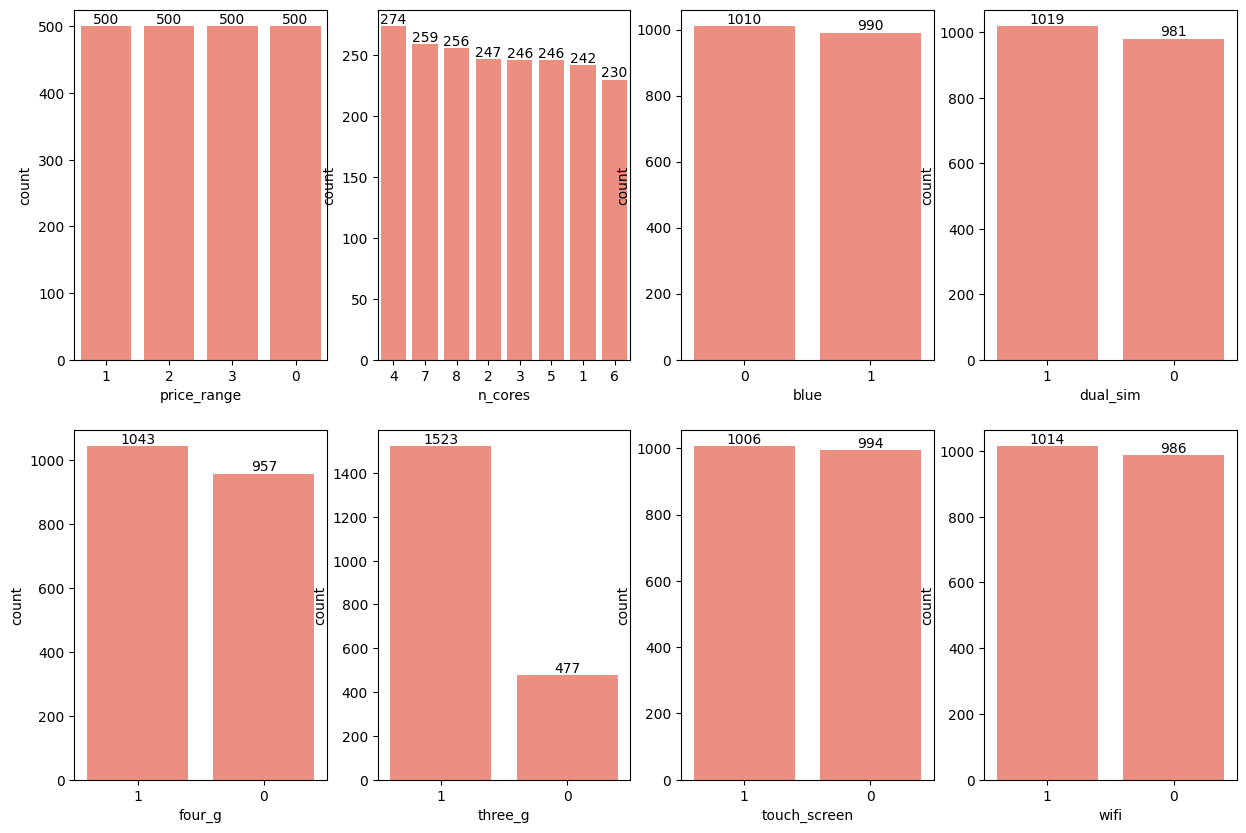

In [25]:
# Checking the distribution of the continuous features
fig, axes = plt.subplots(2, 4, figsize=(15,10))

Catg_Cols = df_categorical.columns
# Original Distributions
for i, col in enumerate(Catg_Cols):
    if i<=3:
        ax = sns.countplot(x=df[col],
                       order=df[col].value_counts(ascending=False).index,ax=axes[0,i],color='#ff826e');
        abs_values = df[col].value_counts(ascending=False).values
        #abs_values = np.round(np.array(df.groupby(col).count()['id']/df.shape[0]),2)
        ax.bar_label(container=ax.containers[0], labels=abs_values)
    else:
        ax = sns.countplot(x=df[col],
                       order=df[col].value_counts(ascending=False).index,ax=axes[1,i-4],color='#ff826e');
        abs_values = df[col].value_counts(ascending=False).values
        #abs_values = np.round(np.array(df.groupby(col).count()['id']/df.shape[0]),2)
        ax.bar_label(container=ax.containers[0], labels=abs_values)



Above Analysis shows that:

- Target column has equal proportionate of data into o-4 categories.
- N_core 4 has the maximum number of records with 274 following with 7(259) & 6(256)
- Majority of phone support 3G facility i.e. 1523
- Rest all the columns are almost balanced

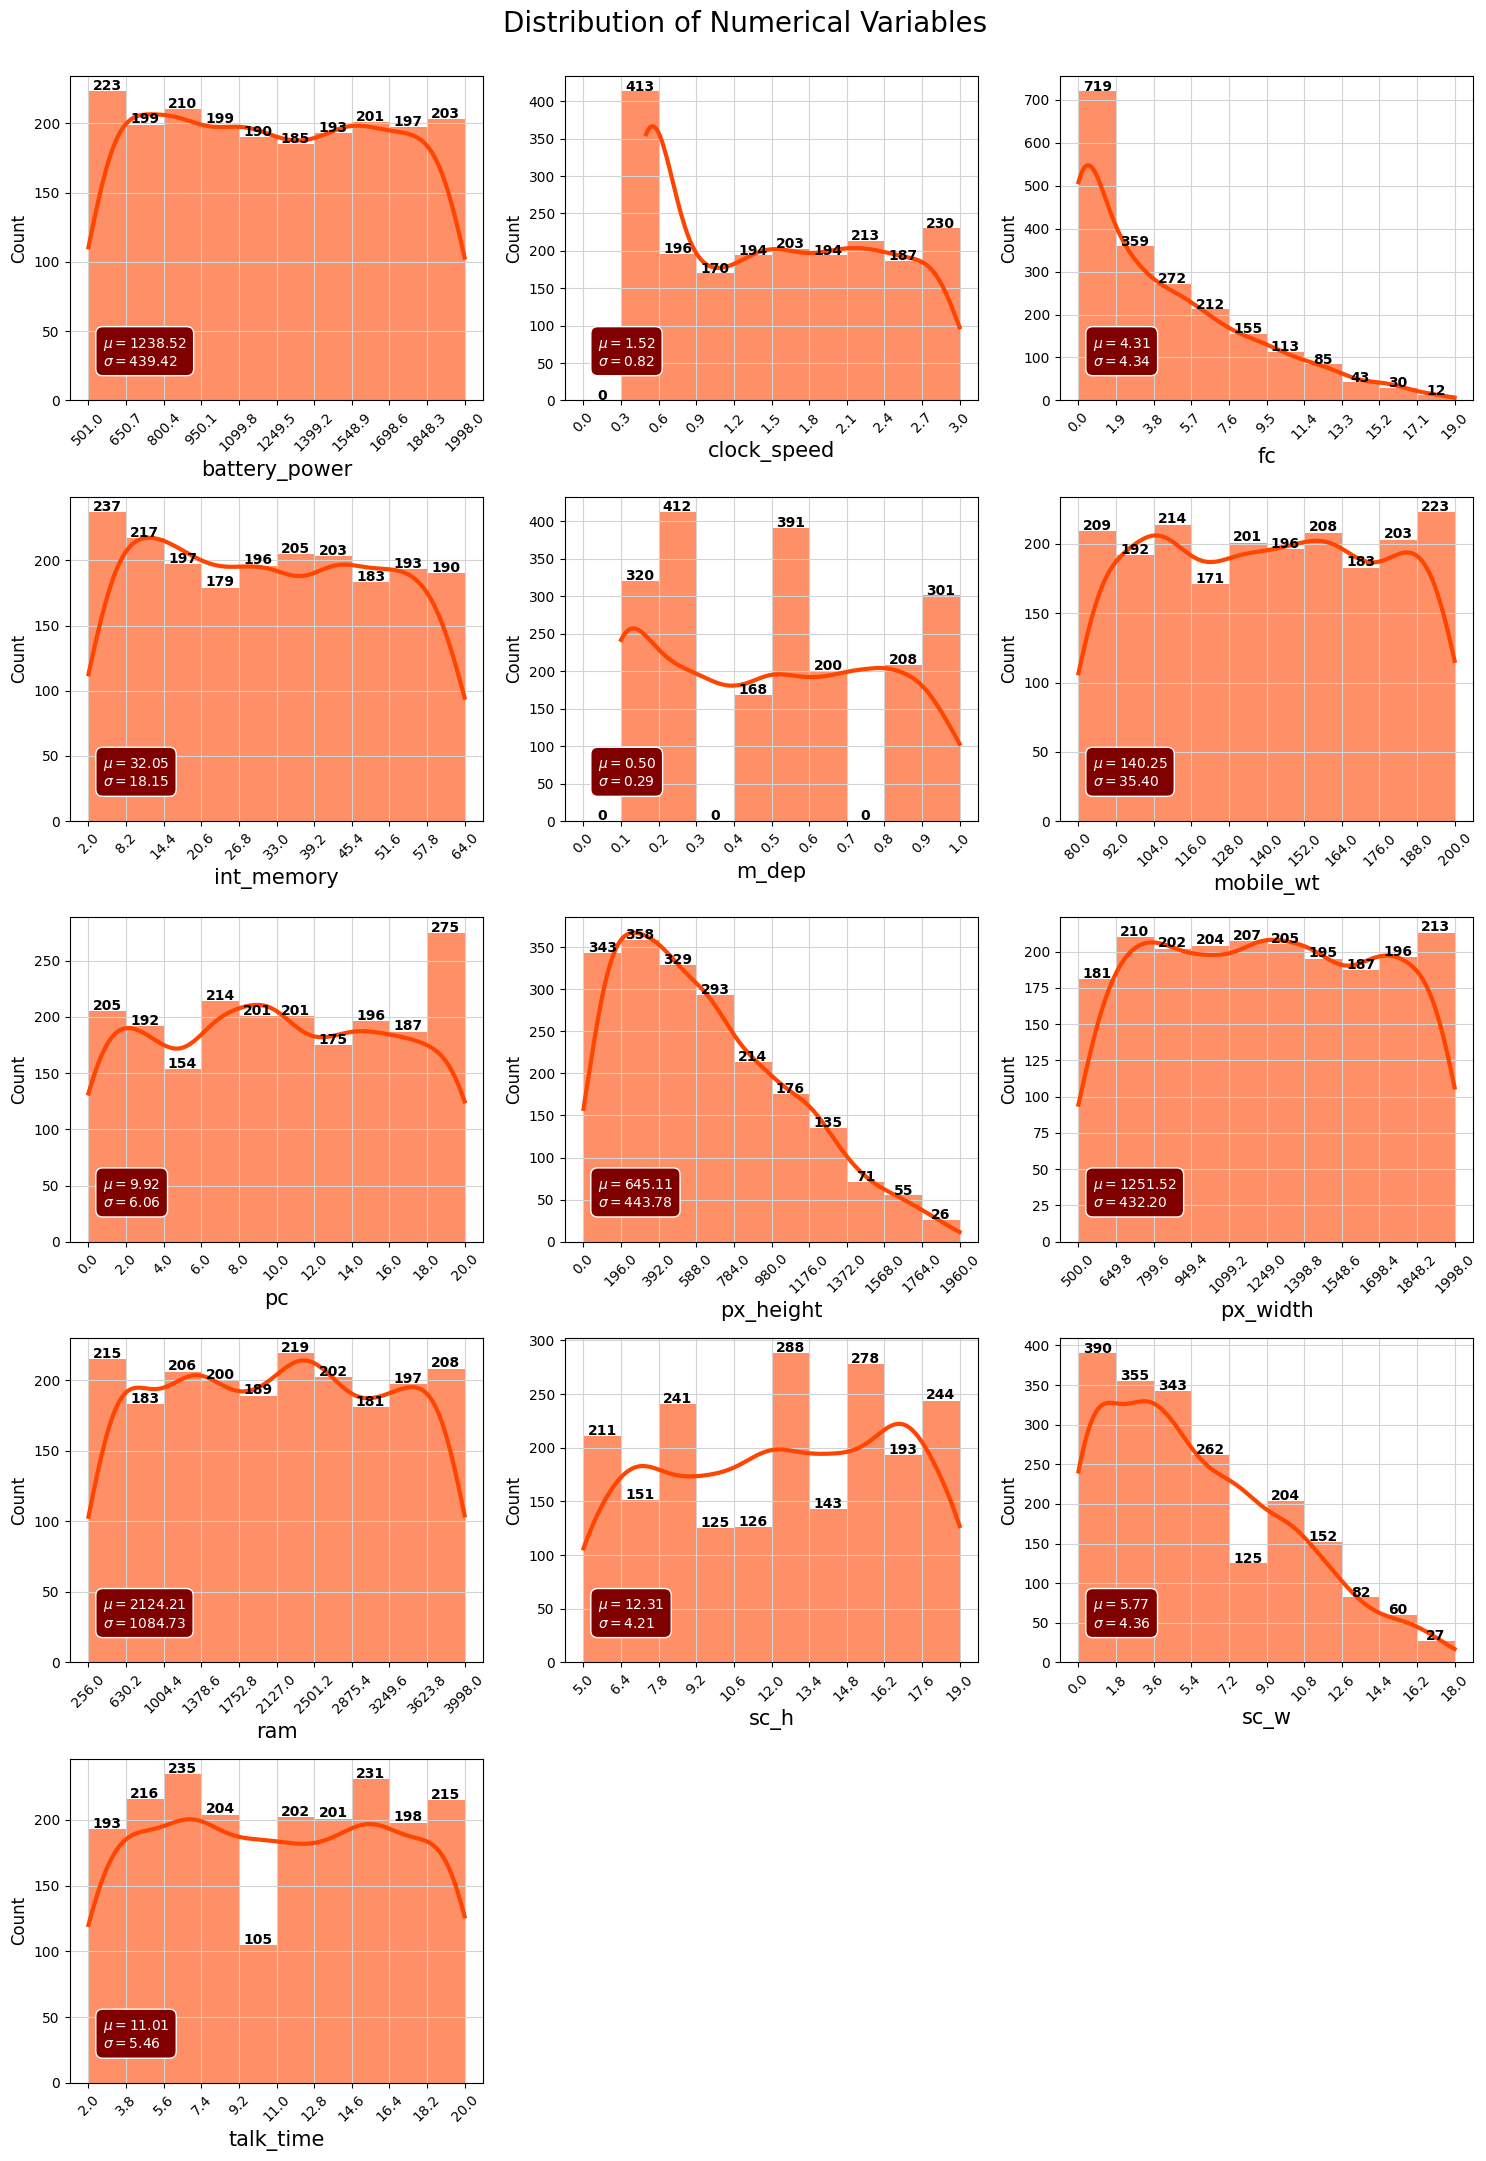

In [28]:
fig, ax = plt.subplots(nrows=5, ncols=3, figsize=(15,22)) #, dpi=200
c = 'orangered'

for i, col in enumerate(df_numerical.columns):
    x = i//3
    y = i%3
    values, bin_edges = np.histogram(df_numerical[col], 
                                     range=(np.floor(df_numerical[col].min()), np.ceil(df_numerical[col].max())))                
    graph = sns.histplot(data=df_numerical, x=col, bins=bin_edges, kde=True, ax=ax[x,y],
                         edgecolor='none', color=c, alpha=0.6, line_kws={'lw': 3})
    ax[x,y].set_xlabel(col, fontsize=15)
    ax[x,y].set_ylabel('Count', fontsize=12)
    ax[x,y].set_xticks(np.round(bin_edges,1))
    ax[x,y].set_xticklabels(ax[x,y].get_xticks(), rotation = 45)
    ax[x,y].grid(color='lightgrey')
    for j,p in enumerate(graph.patches):
        ax[x,y].annotate('{}'.format(p.get_height()), (p.get_x()+p.get_width()/2, p.get_height()+1),
                             ha='center', fontsize=10 ,fontweight="bold")
    textstr = '\n'.join((
    r'$\mu=%.2f$' %df_numerical[col].mean(),
    r'$\sigma=%.2f$' %df_numerical[col].std()
    ))
    ax[x,y].text(0.08, 0.2, textstr, transform=ax[x,y].transAxes, fontsize=10, verticalalignment='top',
                color='white', bbox=dict(boxstyle='round',facecolor='maroon', edgecolor='white', pad=0.5))
    
ax[4, 1].axis('off')
ax[4, 2].axis('off')
plt.suptitle('Distribution of Numerical Variables', fontsize=20) 
plt.tight_layout()   
plt.subplots_adjust(top=0.95)
plt.show()

## Outliers Detection

In [29]:
# Detect Noise values in sc_w 
sc_w_NoiseIndex = df[df['sc_w'] < 2].index

# Detect Noise values in px_height
px_height_NoiseIndex = df[df['px_height'] < 5].index

In [31]:
print('The number of detected noise values for sc_w: ', len(sc_w_NoiseIndex))
print('The number of detected noise values for px_height: ', len(px_height_NoiseIndex))

The number of detected noise values for sc_w:  390
The number of detected noise values for px_height:  9


## Feature Selection

Definition:
Feature selection is the process of selecting a subset of relevant features from a larger set of features in a dataset to improve the performance of a machine learning model. The selected features are used to build a model that can accurately predict the target variable, while ignoring irrelevant or redundant features that can negatively impact model performance.

Advantages:
- It can improve model accuracy by reducing overfitting, which occurs when a model is too complex and captures noise in the data instead of the underlying patterns.

- It can reduce the time and computational resources required to train a model by removing unnecessary features, leading to faster model development and deployment.

- It can improve the interpretability of the model by identifying the most important features that are driving the predictions, making it easier for humans to understand the model and its decision-making process.

Techniques:
Filter methods: These methods use statistical measures to rank the features based on their correlation with the target variable, and select the top-ranked features.

Examples - Pearson correlation coefficient, chi-squared test
Wrapper methods: These methods evaluate the performance of a machine learning model on different subsets of features, and select the subset that produces the best performance.

Examples - Drop-column feature selection.
Embedded methods: These methods incorporate feature selection as part of the model training process, and select the most important features based on their contribution to the model performance.

Examples - LASSO regression, Ridge regression, Decision trees
Dimensionality reduction: These methods reduce the number of features by transforming the original feature space into a lower-dimensional space, while retaining as much of the variance in the data as possible.

Example - PCA

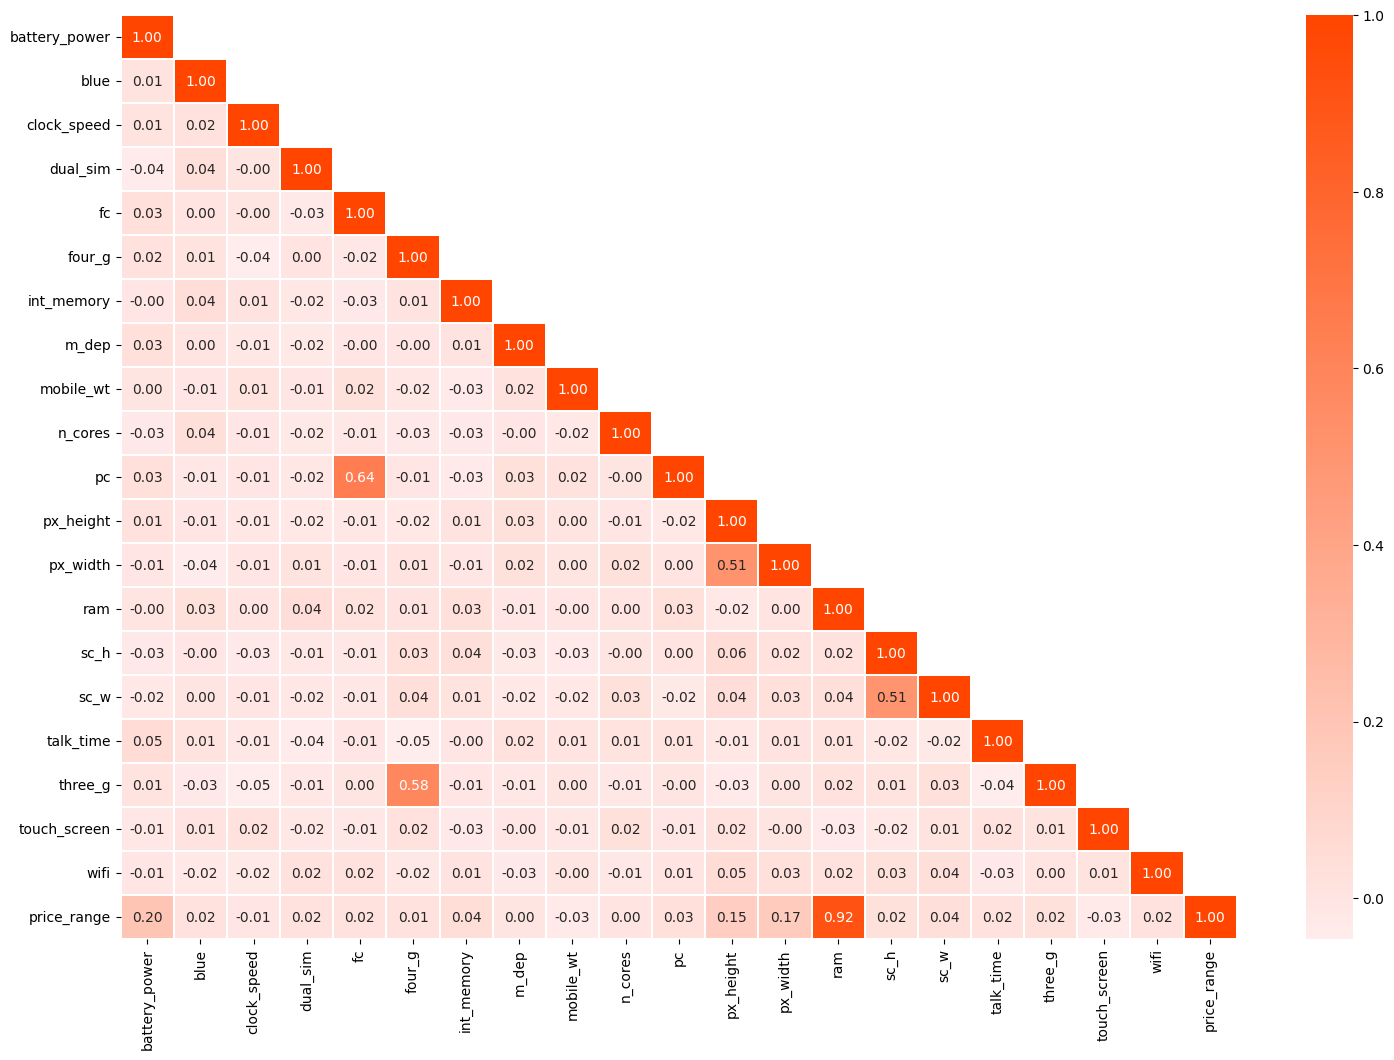

In [33]:
# Define a colormap
orangered_cmap = LinearSegmentedColormap.from_list('orangered', ['#FFECEC','orangered'])

# Calculation of the Spearman correlation
target = 'price_range'
df_ordered = pd.concat([df.drop(target,axis=1), df[target]],axis=1)
corr = df_ordered.corr()

# Create a mask so that we see the correlation values only once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask,1)] = True

# Plot the heatmap correlation
plt.figure(figsize=(18,12))
sns.heatmap(corr, mask=mask, annot=True, cmap=orangered_cmap, fmt='.2f', linewidths=0.2)
plt.show()

Step 5.4.2 | Drop-column Feature Importance¶
Drop-column Feature Importance is a machine learning technique used to evaluate the importance of features in a dataset. It involves measuring the impact of removing a feature on the performance of a pre-trained model. The feature whose removal causes the largest decrease in the model's performance is considered the most important feature. Drop-column feature importance can be used in conjunction with algorithms that provide a built-in measure of feature importance. It is computationally efficient and can provide a more precise measure of feature importance.

Note:
In this project, the target contains 4 classes and the it is completely balanced. Also, none of the classes is of particular importance compared to the other. Therefore, in this project, accuracy can be a good metric to measure the performance of the models.

If we want to evaluate the performance of our models using precision, recall, and f1-score, since our dataset is multi-class and each class is equally important and needs to be evaluated separately, we use macro-level metrics.

In [44]:
def tune_clf_hyperparameters(clf, param_grid, X_train, y_train):
    cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=0)
    clf_grid = RandomizedSearchCV(estimator=clf,param_distributions=param_grid,cv=cv,scoring='accuracy',n_jobs=-1)
    clf_grid.fit(X_train,y_train)
    print('Done')
    print(f'Best Hypermarameters:\n',clf_grid.best_params_)
    return clf_grid.best_estimator_

In [45]:
def drop_column_importance(model, X_train, y_train, random_state=0):
    # list containing feature importances
    importances = []
    # Clone the model
    model_clone = clone(model)
    # Set random_state for comparability
    model_clone.random_state = random_state
    # Train the model
    model_clone.fit(X_train, y_train)
    # Create the cross-validation object using StratifiedKFold 
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
    # Score the benchmark model using cross-validation
    benchmark_score = cross_val_score(model_clone, X_train, y_train, cv=cv, scoring=f1_metric,n_jobs=-1).mean()

    print('BenchmarkDone')
    # Iterate over all features and store feature importance
    for col in X_train.columns:
        # Clone the model
        model_clone = clone(model)
        # Set random_state for comparability
        model_clone.random_state = random_state
        # Traint the model on the the dataset with a single feature removed
        model_clone.fit(X_train.drop(col, axis = 1), y_train)
        # Score the droped-column model
        drop_column_score = cross_val_score(model_clone, X_train.drop(col,axis=1), y_train, cv=cv, scoring=f1_metric,n_jobs=-1).mean()
        # Store feature importance which is defined as the difference between the benchmark and the new model score
        importances.append(benchmark_score - drop_column_score)
    
    print('Done')
    # Return the features along with their importances in the form of a dataframe
    importances_df = pd.DataFrame({'feature': X_train.columns, 'feature importance': importances}) \
                     .sort_values('feature importance', ascending = False).reset_index(drop = True)
           
    return importances_df   

In [46]:
def drop_column_importance_plot(model, X_train, y_train):
    # Call drop-column feature importance function
    df_drop_column = drop_column_importance(model, X_train, y_train, random_state=0)
    # Rename columns
    df_drop_column.columns = ['Feature', 'Feature Importance']
    
    # Plot barchart
    plt.figure(figsize=(12,10))
    sns.barplot(data=df_drop_column, x='Feature Importance', y='Feature', orient='h', color='royalblue')
    plt.title('Drop Column Feature Importance', fontsize=20)
    plt.show()

In [52]:
def model_evaluation(clf, X_train, X_test, y_train, y_test, model_name):
    '''
    This function provides a complete report of the model's performance including classification reports and confusion matrix
    '''
    # Set font scale
    sns.set(font_scale=1.5)
    
    # Generate classification report for training set
    y_pred_train = clf.predict(X_train)
    print("\n\t  Classification report for training set")
    print("-"*55)
    print(classification_report(y_train, y_pred_train))

    # Generate classification report for test set
    y_pred_test = clf.predict(X_test)
    print("\n\t   Classification report for test set")
    print("-"*55)
    print(classification_report(y_test, y_pred_test))
    print('\n')
    
    # Create figure and subplots 
    fig, (ax1, ax2) = plt.subplots(1, 2, dpi=90, figsize=(12, 5))
    
    
    # Report desired results as a summary in the form of a table
    result = metrics_calculator(clf, X_test, y_test, model_name)
    table = ax1.table(cellText=result.values, colLabels=result.columns, rowLabels=result.index, loc='center')
    table.scale(0.6, 4.2)
    table.set_fontsize(12)
    ax1.axis('tight')
    # Hide the axes
    ax1.axis('off')
    # set the title
    ax1.set_title('{} Performance Summary on Test Data'.format(model_name), fontsize=18)
    # Modify color 
    for key, cell in table.get_celld().items():
        if key[0] == 0:
            cell.set_color('orangered')
              
    # Plot confusion matrix for test set
    ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, colorbar=False, cmap=orangered_cmap, ax=ax2)
    ax2.set_title('Confusion Matrix for Test Data')                                     
    ax2.grid(False)
            
    plt.tight_layout()
    plt.show() 

In [48]:
# Define a scorer function
def f1_metric(model, X_train, y_train):
    '''
    This function reports f1-score metric for the class specified by 'Positive Label' (or '1')
    '''
    return f1_score(y_train, model.predict(X_train), average='binary')

In [54]:
def metrics_calculator(clf, X_test, y_test, model_name):
    '''
    This function calculates all desired performance metrics for a given model on test data.
    '''
    y_pred = clf.predict(X_test)
    result = pd.DataFrame(data=[accuracy_score(y_test, y_pred),
                                precision_score(y_test, y_pred, average='macro'),
                                recall_score(y_test, y_pred, average='macro'),
                                f1_score(y_test, y_pred, average='macro')],
                          index=['Accuracy','Macro Precision','Macro Recall','Macro F1-score'],
                          columns = [model_name])
    
    result = (result * 100).round(2).astype(str) + '%'                            
    return result

# Model Building 

### Decision Tree - Model Building

In [49]:
from sklearn.model_selection import RandomizedSearchCV

In [50]:
# Weights associated with classes
class_weights = [{0:x, 1:1.0-x} for x in np.linspace(0.001,1,20)]
    
# Define the hyperparameter grid
param_grid = {'criterion': ['gini', 'entropy', 'log_loss'],
              'max_depth': np.arange(1, 10),
              'min_samples_split': np.arange(1, 10),
              'min_samples_leaf': np.arange(1, 10),
              'max_features': [None, 'sqrt', 'log2'],
              'class_weight': class_weights} 

# Perform train test split
X = df.drop(['price_range'],axis=1)
y = df['price_range']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

# Create a  Decision Tree Classifier object
dt = DecisionTreeClassifier(random_state=0)

# Find the best classifier with the optimal hyperparameters
dt_opt = tune_clf_hyperparameters(dt, param_grid, X_train, y_train)

Done
Best Hypermarameters:
 {'min_samples_split': 9, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 8, 'criterion': 'gini', 'class_weight': {0: 0.5267894736842105, 1: 0.4732105263157895}}



	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       405
           1       0.96      0.91      0.93       408
           2       0.93      0.95      0.94       401
           3       0.97      0.97      0.97       386

    accuracy                           0.95      1600
   macro avg       0.95      0.95      0.95      1600
weighted avg       0.95      0.95      0.95      1600


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        95
           1       0.77      0.74      0.76        92
           2       0.70      0.75      0.72        99
           3       0.87      0.85      0.86       114

    accuracy                           0.81       400
   macro avg       0.81      0.81      0.81 

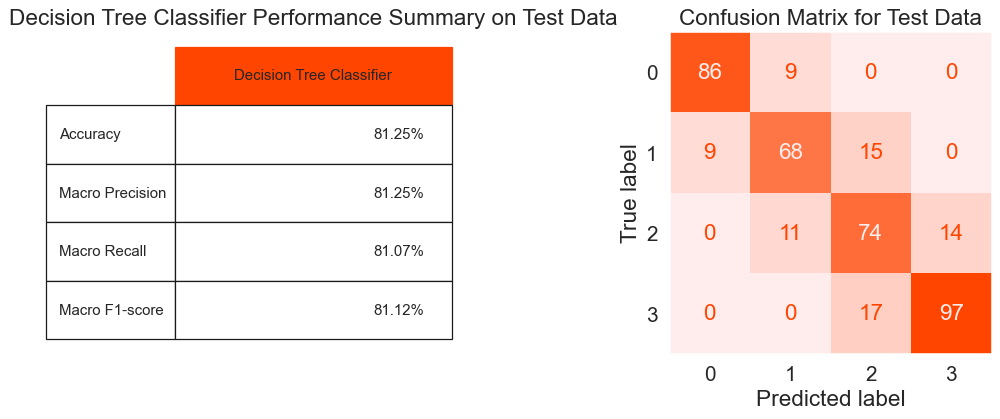

In [55]:
model_evaluation(dt_opt, X_train, X_test, y_train, y_test, 'Decision Tree Classifier')

Above model shows that decision tree model is overtrained. As there is slight difference in accuracy and other metrics as compare to training and testing data set. Lets see if we features could be remove using drop column feature.

BenchmarkDone
Done


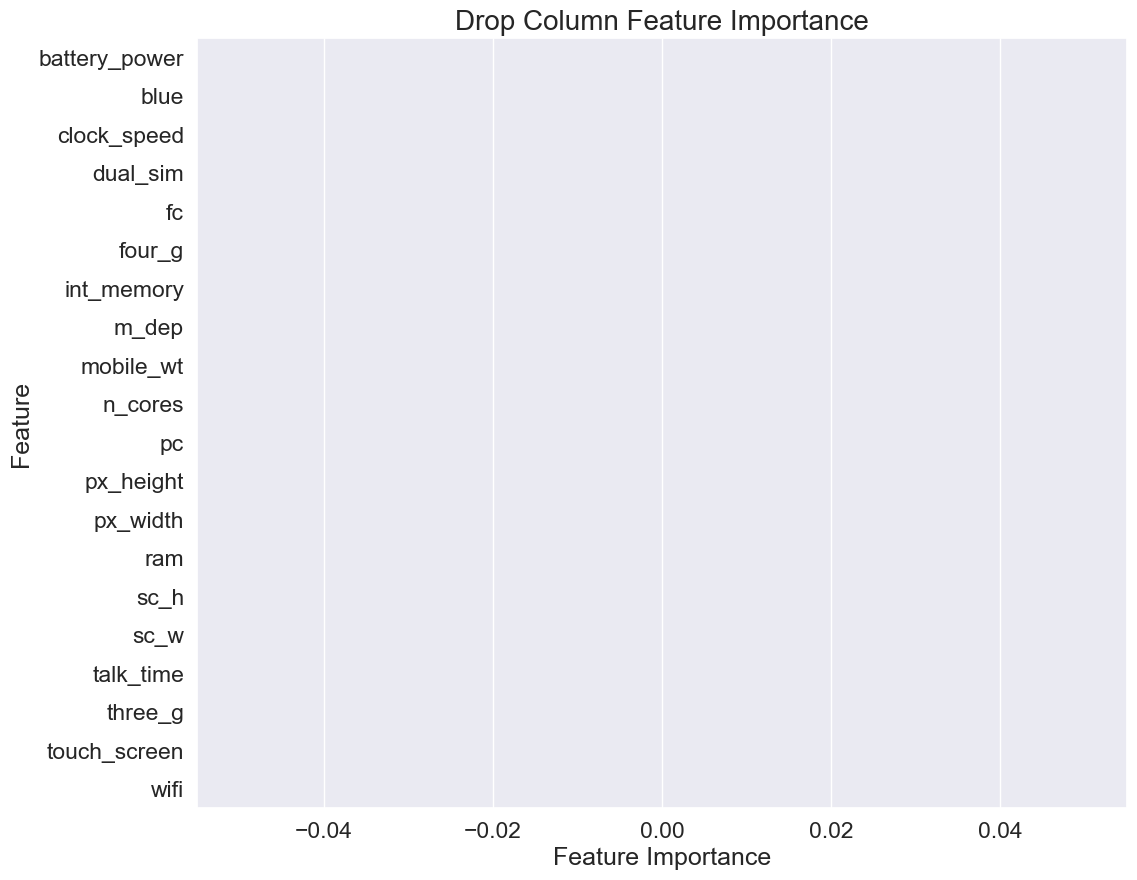

In [58]:
drop_column_importance_plot(dt_opt, X_train, y_train)

In [61]:
# Save the final performance of Decision Tree classifier
dt_result = metrics_calculator(dt_opt, X_test, y_test, 'Decision Tree')
import pickle
pickle.dump(dt_opt,open('DecisionTreeModel.pkl','wb'))
dt_result

,Decision Tree
Accuracy,81.25%
Macro Precision,81.25%
Macro Recall,81.07%
Macro F1-score,81.12%


In [95]:
pickle.dump(dt_opt,open('DecisionTreeClassifier.pkl','wb'))

## Random Forest Classifier - Model Building

In [63]:
# Weights associated with classes
class_weights = [{0:x, 1:1.0-x} for x in np.linspace(0.001,1,20)]

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150], 
    'max_depth': np.arange(5, 12),
    'min_samples_split': [1, 2, 3],
    'min_samples_leaf': [1, 2, 3],
    'max_features' : list(range(0,len(df.columns))),
    'bootstrap':[True,False],
    'class_weight': class_weights
}
# Perform train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a random forest classifier object
rf = RandomForestClassifier(criterion='gini', random_state=0)

# Find the best classifier with the optimal hyperparameters
rf_opt = tune_clf_hyperparameters(rf, param_grid, X_train, y_train)

Done
Best Hypermarameters:
 {'n_estimators': 150, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 17, 'max_depth': 8, 'class_weight': {0: 0.5267894736842105, 1: 0.4732105263157895}, 'bootstrap': True}


BenchmarkDone
Done


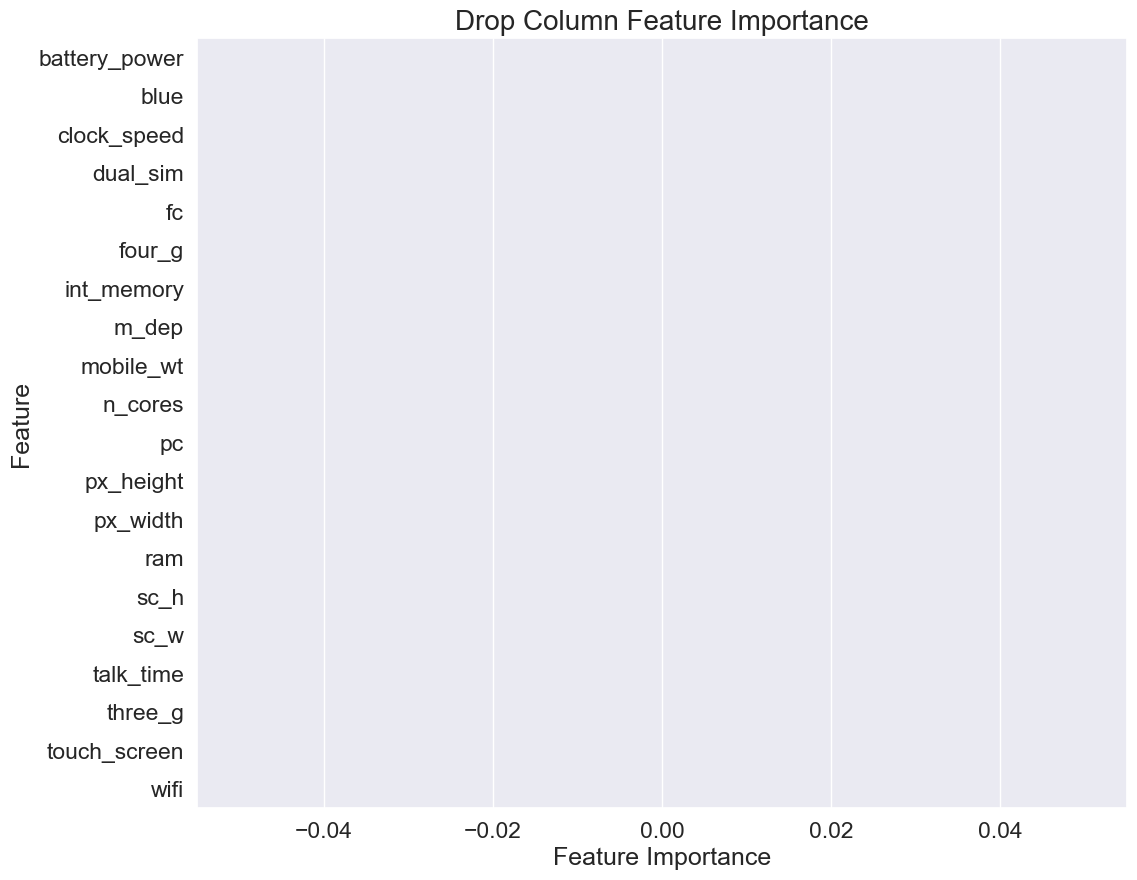

In [64]:
drop_column_importance_plot(rf_opt, X_train, y_train)


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       405
           1       0.99      0.95      0.97       408
           2       0.94      1.00      0.97       401
           3       1.00      0.98      0.99       386

    accuracy                           0.98      1600
   macro avg       0.98      0.98      0.98      1600
weighted avg       0.98      0.98      0.98      1600


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.95      0.95        95
           1       0.89      0.82      0.85        92
           2       0.80      0.83      0.82        99
           3       0.89      0.94      0.91       114

    accuracy                           0.89       400
   macro avg       0.89      0.88      0.88 

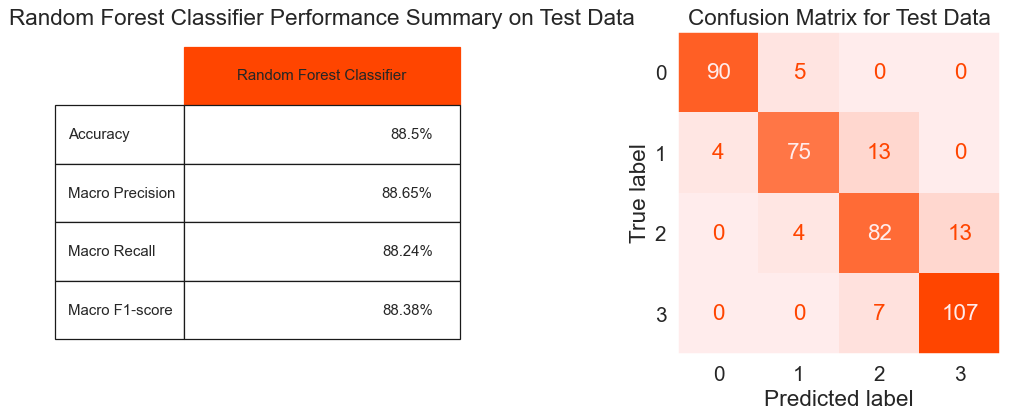

In [65]:
model_evaluation(rf_opt, X_train, X_test, y_train, y_test, 'Random Forest Classifier')

Random Forest Classifier is overfitted model as there is slight difference in accuracy metrics between training and testing dataset. We need to tune it proper to reduce overfitting problem

In [66]:
# Build random forest classifier object considering the obtained optimal values for hyperparameters
rf_final = RandomForestClassifier(criterion='gini', max_features=None, bootstrap=True,  n_estimators=100, 
                                  max_depth = 9,  min_samples_leaf=6, min_samples_split=2,
                                  class_weight={0: 0.58, 1: 0.42}, random_state=0)
                             
                            
# Train the final Random Forest model
rf_final.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.58, 1: 0.42}, max_depth=9,
                       max_features=None, min_samples_leaf=6, random_state=0)


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       405
           1       0.97      0.90      0.93       408
           2       0.91      0.97      0.94       401
           3       0.98      0.97      0.97       386

    accuracy                           0.95      1600
   macro avg       0.95      0.95      0.95      1600
weighted avg       0.95      0.95      0.95      1600


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.92      0.94        95
           1       0.86      0.82      0.84        92
           2       0.81      0.85      0.83        99
           3       0.91      0.95      0.93       114

    accuracy                           0.89       400
   macro avg       0.89      0.88      0.88 

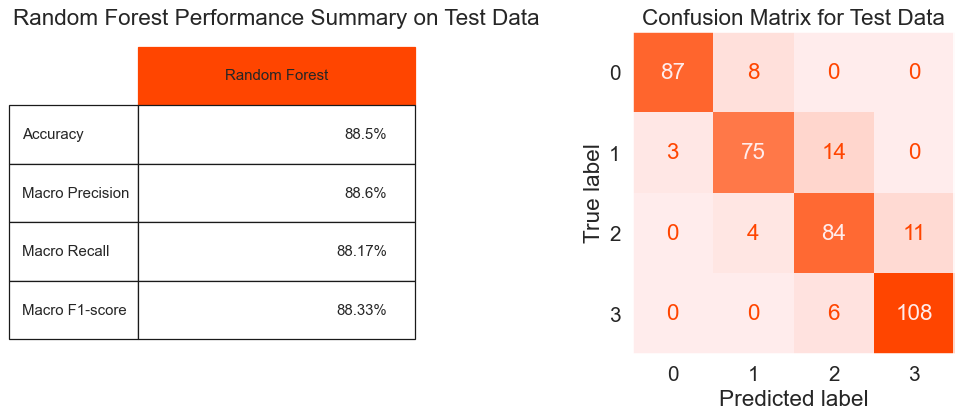

In [67]:
model_evaluation(rf_final, X_train, X_test, y_train, y_test, 'Random Forest')

In [68]:
# Save the final performance of Random Forest classifier
rf_result = metrics_calculator(rf_final, X_test, y_test, 'Random Forest')
rf_result

,Random Forest
Accuracy,88.5%
Macro Precision,88.6%
Macro Recall,88.17%
Macro F1-score,88.33%


In [94]:
pickle.dump(rf_final,open('RandomForestClassifer.pkl','wb'))

## Extra Tree Classifier - Model Building

In [71]:
# Weights associated with classes
class_weights = [{0:x, 1:1.0-x} for x in np.linspace(0.001,1,20)]

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [70, 100, 150], 
    'max_depth': [10,12,14],
    'min_samples_split': [1,2,3],
    'min_samples_leaf': [1,2,3],
    'max_features' : list(range(0,len(df.columns))),
    'bootstrap':[True,False],
    'class_weight': class_weights
}

#Perform train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

# Create a random forest classifier object
et = ExtraTreesClassifier(criterion='gini', random_state=0)

# Find the best classifier with the optimal hyperparameters
et_opt = tune_clf_hyperparameters(et, param_grid, X_train, y_train)

Done
Best Hypermarameters:
 {'n_estimators': 150, 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_features': 18, 'max_depth': 12, 'class_weight': {0: 0.3164736842105263, 1: 0.6835263157894738}, 'bootstrap': False}


BenchmarkDone
Done


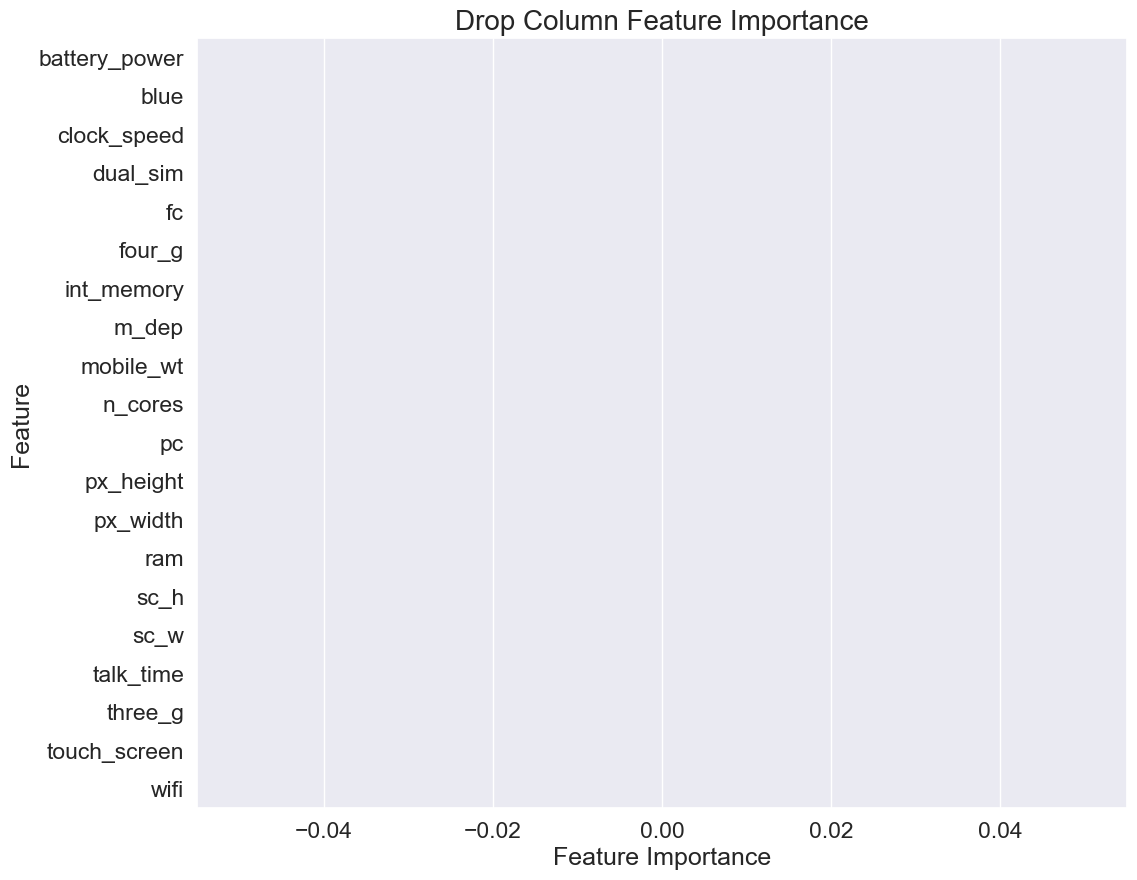

In [72]:
drop_column_importance_plot(et_opt, X_train, y_train)


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       400
           1       0.99      1.00      1.00       400
           2       1.00      1.00      1.00       400
           3       1.00      1.00      1.00       400

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       100
           1       0.89      0.93      0.91       100
           2       0.87      0.89      0.88       100
           3       0.95      0.91      0.93       100

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92 

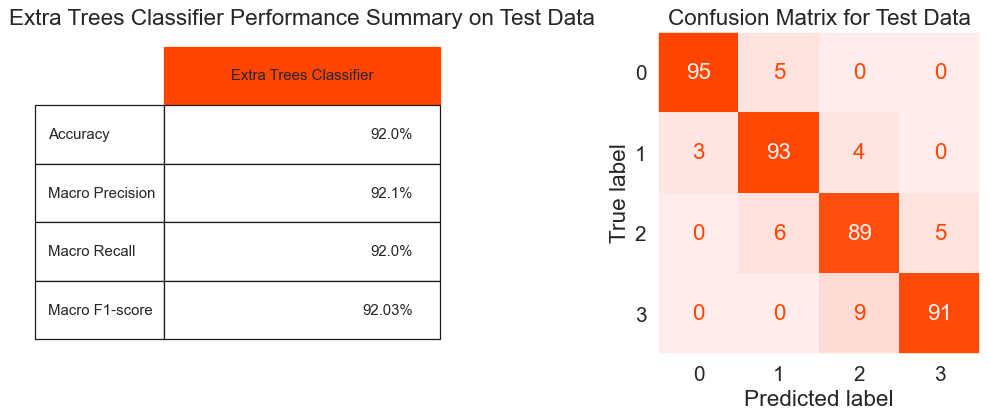

In [73]:
model_evaluation(et_opt, X_train, X_test, y_train, y_test, 'Extra Trees Classifier')

This model is giving favourable accuracy metrics as compare to other models!

In [74]:
# Save the final performance of Random Forest classifier
Et_result = metrics_calculator(et_opt, X_test, y_test, 'Extra Trees Classifier')
Et_result

,Extra Trees Classifier
Accuracy,92.0%
Macro Precision,92.1%
Macro Recall,92.0%
Macro F1-score,92.03%


In [93]:
pickle.dump(et_opt,open('ExtraTressClassifer.pkl','wb'))

## Gradient Boosting - Model Building

In [75]:
# Define the hyperparameter grid for tuning
gbc_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [1, 2, 3, 4, 5],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'max_features': [None, 'sqrt', 'log2'],
    'loss': ['deviance', 'exponential'],
    'criterion': ['friedman_mse', 'squared_error'],
    'subsample': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3]
}

# Perform train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

# Initialize the Gradient Boosting Classifier
gbc = GradientBoostingClassifier(random_state=0)

# Find the best hyperparameters from the tuning process
gbc_opt = tune_clf_hyperparameters(gbc, gbc_param_grid, X_train, y_train)

Done
Best Hypermarameters:
 {'subsample': 0.3, 'n_estimators': 200, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 3, 'loss': 'deviance', 'learning_rate': 0.1, 'criterion': 'squared_error'}


BenchmarkDone
Done


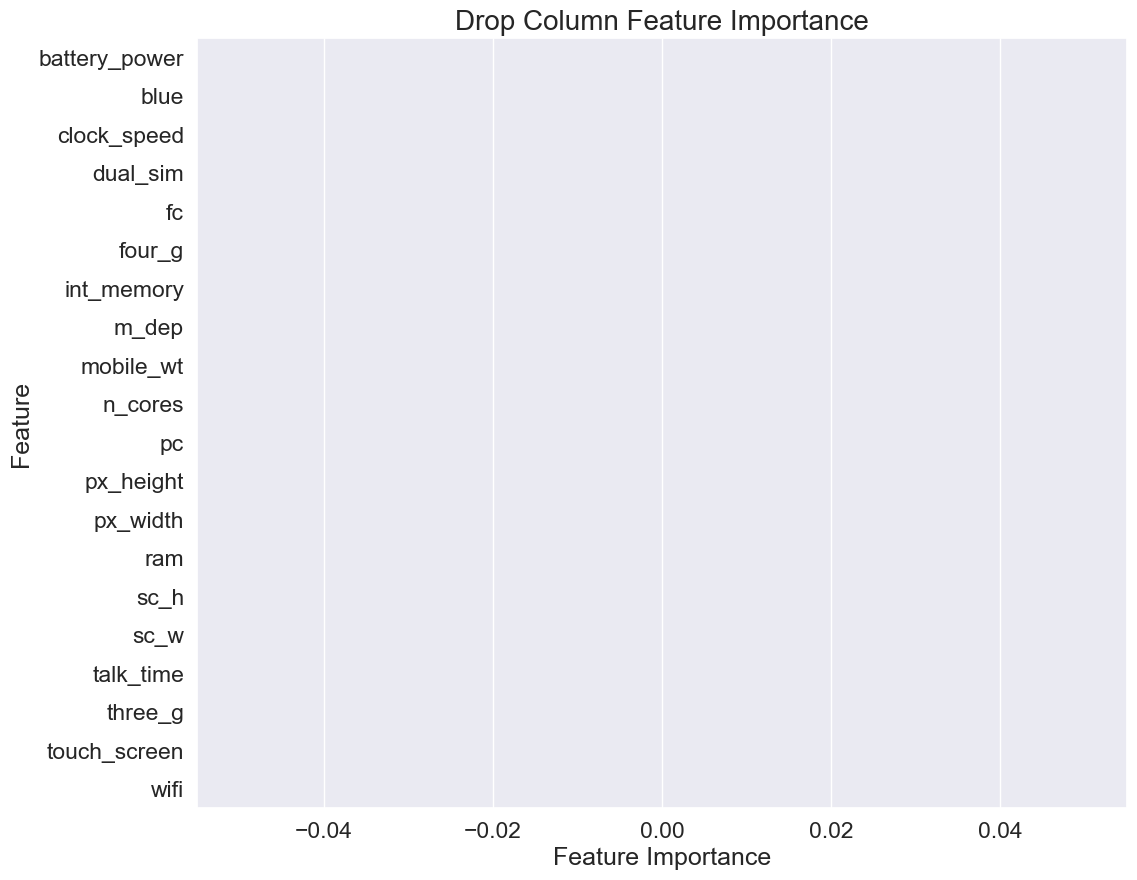

In [76]:
drop_column_importance_plot(gbc_opt, X_train, y_train)


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       400
           1       1.00      0.99      1.00       400
           2       1.00      1.00      1.00       400
           3       1.00      1.00      1.00       400

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       100
           1       0.85      0.89      0.87       100
           2       0.84      0.84      0.84       100
           3       0.93      0.89      0.91       100

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89 

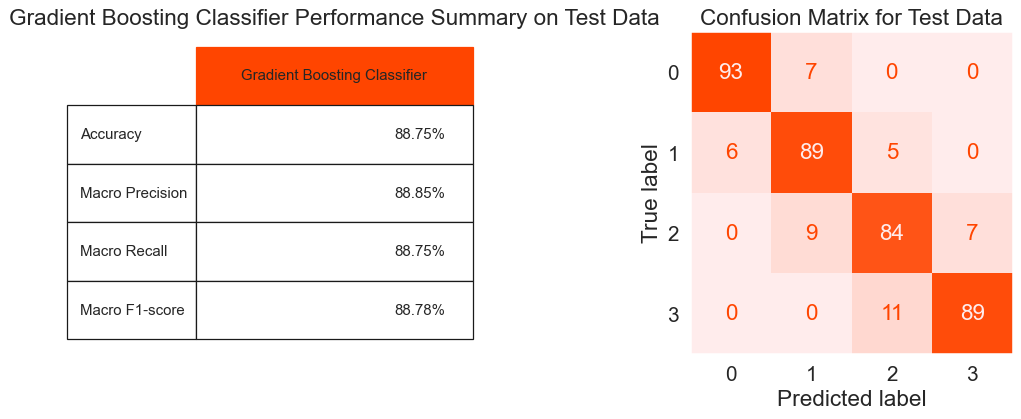

In [77]:
model_evaluation(gbc_opt, X_train, X_test, y_train, y_test, 'Gradient Boosting Classifier')

In [101]:
# Save the final performance of Random Forest classifier
GB_result = metrics_calculator(gbc_opt, X_test, y_test, 'Gradient Boosting Classifier')
GB_result

,Gradient Boosting Classifier
Accuracy,88.75%
Macro Precision,88.85%
Macro Recall,88.75%
Macro F1-score,88.78%


In [92]:
pickle.dump(gbc_opt,open('GradientBosstModel.pkl','wb'))

## XGBoost - Model Building

In [80]:
# Perform train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0,stratify=y)

# Define imbalance ratio
ratio = sum(y_train==0)/sum(y_train==1) 

# Define the hyperparameter grid to search
xgb_param_grid = {
    'max_depth': [5, 6, 7],
    'learning_rate': [0.1, 0.2, 0.3],
    'n_estimators': [50, 100, 200],
    'min_child_weight': [1, 5, 10],
    'scale_pos_weight': [ratio, ratio*1.3, ratio*1.5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'colsample_bylevel': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [0, 0.1, 1],
    'max_delta_step': [0, 1, 2],
    'gamma': [0, 0.1, 1],
    'max_leaf_nodes': [2, 4, 6]
}


# Create the Decision Tree classifier as the base estimator
xgb = XGBClassifier(random_state=0)

# Find the best hyperparameters from the tuning process
xgb_opt = tune_clf_hyperparameters(xgb, xgb_param_grid, X_train, y_train)

[19:12:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_leaf_nodes", "scale_pos_weight" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:12:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Done
Best Hypermarameters:
 {'subsample': 1.0, 'scale_pos_weight': 1.5, 'reg_lambda': 1, 'reg_alpha': 0, 'n_estimators': 50, 'min_child_weight': 5, 'max_leaf_nodes': 4, 'max_depth': 7, 'max_delta_step': 2, 'learning_rate': 0.3, 'gamma': 0.1, 'colsample_bytree': 1.0, 'colsamp

[19:12:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_leaf_nodes", "scale_pos_weight" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:12:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
BenchmarkDone
[19:12:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_leaf_nodes", "scale_pos_weight" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings b

[19:12:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_leaf_nodes", "scale_pos_weight" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:12:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:12:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_leaf_nodes", "scale_pos_weight" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed do

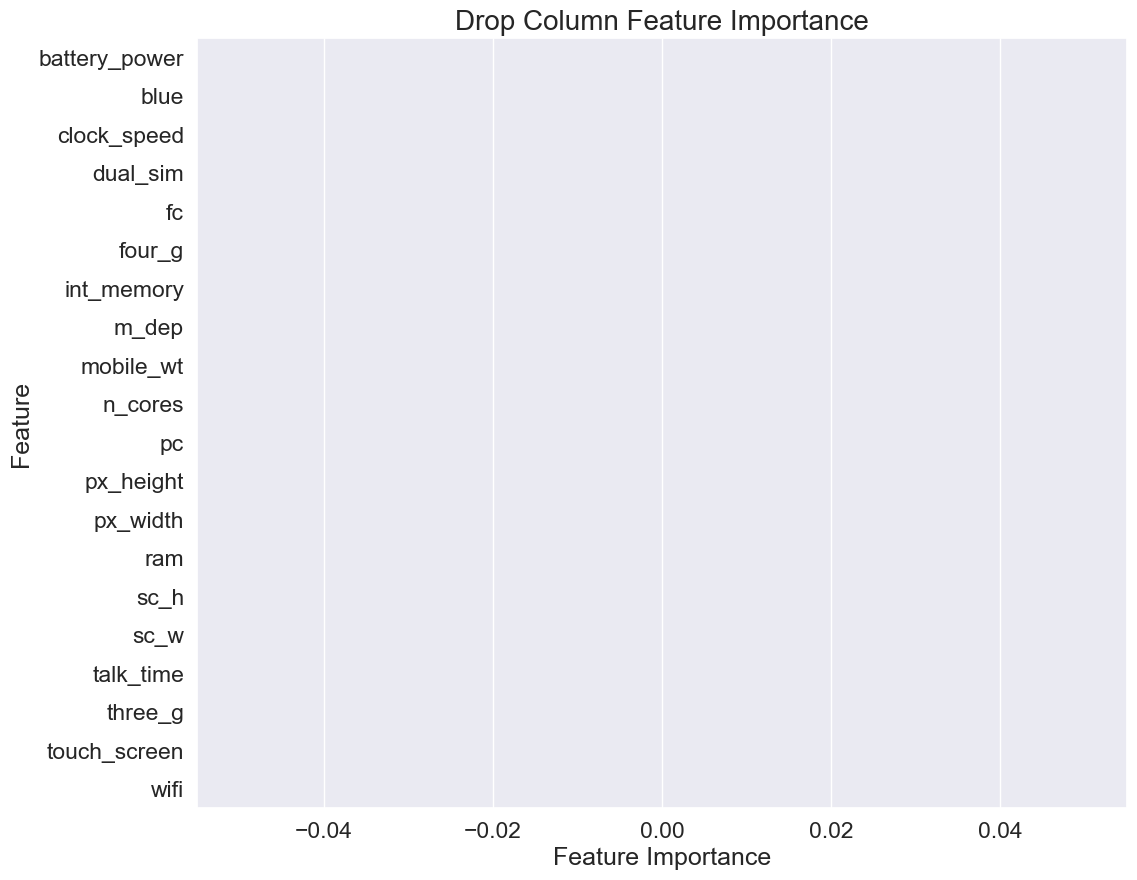

In [81]:
drop_column_importance_plot(xgb_opt, X_train, y_train)


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       400
           1       1.00      1.00      1.00       400
           2       1.00      1.00      1.00       400
           3       1.00      1.00      1.00       400

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       100
           1       0.88      0.91      0.89       100
           2       0.86      0.87      0.87       100
           3       0.95      0.90      0.92       100

    accuracy                           0.91       400
   macro avg       0.91      0.91      0.91 

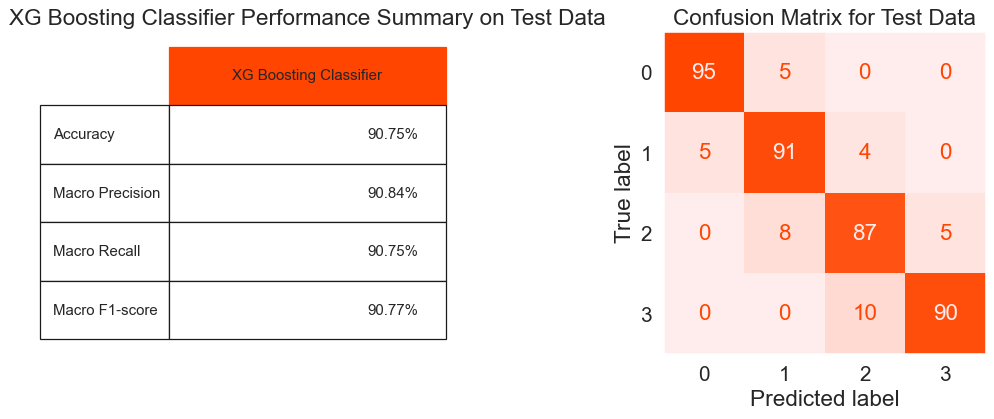

In [91]:
model_evaluation(xgb_opt, X_train, X_test, y_train, y_test, 'XG Boosting Classifier')

In [83]:
# Save the final performance of XGBoost classifier
xgb_result = metrics_calculator(xgb_opt, X_test, y_test, 'XGBoost')
xgb_result

,XGBoost
Accuracy,90.75%
Macro Precision,90.84%
Macro Recall,90.75%
Macro F1-score,90.77%


In [88]:
pickle.dump(xgb_opt,open('XGBosstModel.pkl','wb'))

In [100]:
gbc_opt

GradientBoostingClassifier(criterion='squared_error', max_features='sqrt',
                           min_samples_leaf=2, min_samples_split=4,
                           n_estimators=200, random_state=0, subsample=0.3)

In [103]:
# Concatenate previous classifiers perfermance results into a single dataframe
results = pd.concat([dt_result, rf_result,Et_result,
                     GB_result,xgb_result], axis=1).T

# Sort the dataframe in descending order based on F1-score values
results.sort_values(by='Macro F1-score', ascending=False, inplace=True)

# Color the F1-score column
#results.style.applymap(lambda x: 'background-color: royalblue', subset='F1-score')
results

,Accuracy,Macro Precision,Macro Recall,Macro F1-score
Extra Trees Classifier,92.0%,92.1%,92.0%,92.03%
XGBoost,90.75%,90.84%,90.75%,90.77%
Gradient Boosting Classifier,88.75%,88.85%,88.75%,88.78%
Random Forest,88.5%,88.6%,88.17%,88.33%
Decision Tree,81.25%,81.25%,81.07%,81.12%


## Conclusion

Extra Trees Classifier and XGBoost would be the most suitable model for this problem!